# Аналитика данных в игровой индустрии
Перед нами исторические данные до 2016 о продажах игр,оценках пользователей и экспертов, информация о жанрах и платформах. Мы планируем кампанию на 2017 и перед нами стоит основная задача выработать принцип работы с такими данными, чтобы впоследствии прогнозировать продажи на любой выбранный нами год.

**Цель исследования:**

Выявить какие именно факторы определяют потенциально популярный продукт на рынке игровой индустрии в целом и каждом из исследуемых регионов по отдельности. Сформировать прогноз на 2017 год на основании этих параметров.

**Ход исследования:**
1. Обзор данных файла *games.csv*;
2. Предобработка данных:
 - Заполнение пропусков;
 - Удаление неинформативных данных;
 - Преведение типов данных столбцов;
 - Удаление явных и неявных дубликатов
3. Исследовательский анализ данных:
 - Распределение общего количества выпущенных игр по годам;
 - Распределение общего количества выпущенных игр по платформам;
 - Выявление  и анализ средней длительности жизненного цикла платформы;
 - Выявление и анализ потенциально популярных платформ на 2017 год;
 - Рассчет корреляции между оценками пользователей и суммарными продажами игр в рамках самой популярной платформы;
 - Рассчет корреляции между оценками критиков и суммарными продажами игр в рамках самой популярной платформы
4. Cоставление портрета пользователя по каждому региону:
 - Определить топ-5 популярных платформ по каждому региону;
 - Определить топ-5 популярных жанров по каждому региону;
 - Выявление связи между популярными платформами и играми или ее отсутствии;
 - Анализ сходств и отличий в предпочтениях игроков из разных регионов;
 - Исследование влияния рейтинга ESRB на продажи в каждом из регионов
5. Проверка двух гипотез:
 - Гипотеза о равенстве средних пользовательских оценках платформ *Xbox One* и *PC*;
 - Гипотеза о неравенстве средних пользовательских оценках жанров *Action* и *Sports*
6. Общий вывод

## Откроем файл с данными и изучим общую информацию. 

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy import stats as st


In [4]:
try:
    df = pd.read_csv('games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')


Выгрузим первые 10 строк таблицы, чтобы получить общую информацию о содержащихся в ней данных:

In [5]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Приведем все названия столбцов к нижнему регистру.

In [6]:
df.columns = df.columns.str.lower()

Получим информацию о типах данных в столбцах и количестве пропусков:

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [8]:
pd.DataFrame(round(df.isna().mean()*100,1)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year_of_release,1.600000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.300000
user_score,40.100000


Мы видим, что большое количество пропусков данных содержится в столбцах, хранящих информацию о годе выпуске игры, оценке критиков, оценке пользователей и рейтинге от организации ESRB. По два значения пропущено в столбцах, где указаны название игры и её жанр.
Переходим к следующему этапу нашего исследования - избавление от пропусков и приведению типов данных столбцов.

---

## Заполнение пропусков в данных и приведение типов данных

Для начала рассмотрим строки датасета, содержащие пропущенные значения в названии игры. Таких строк немного

In [9]:
df.query('name.isna() == True').head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Мы видим, что данные строки имеют пропущенные значения также в данных о жанре игры, оценке критиков, оценке пользователей и возрастном рейтинге. При всем при этом продажи данной игры незначительны. Данные записи датасета не будут иметь большой ценности в дальнейшем исследовании, так как содержат крайне мало информации, поэтому удалим их:

In [10]:
df = df.dropna(subset=['name'])
df = df.reset_index(drop=True)

In [11]:
df.isna().sum()

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

Рассмотрим пропуски в столбце с информацией о годе выпуска игры. Пропущенных значений не так много, поэтому будет верным решением удалить такие строки, так как корректно заполнить пропущенную информацию не представляется возможным:

In [12]:
df = df.dropna(subset=['year_of_release'])
df = df.reset_index(drop=True)

Столбец содержит только целые значения, поэтому изменим его тип данных:

In [13]:
df['year_of_release'] = df['year_of_release'].astype('int')

In [14]:
df.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         6605
rating             6676
dtype: int64

Рассмотрим следующий столбец, содержащий информацию об оценках критиков:

In [15]:
df['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Разброс в значениях достаточно велик, мы не сможем заполнить пропуски не исказив общую картину оценок критиков, поэтому оставим пропуски как есть:

Рассмотрим следующий столбец, содержащий информацию об оценках игр пользователями:

In [16]:
df['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Обратим внимание, что помимо значения "nan", которое обозначает пропуск значений, встречается также значение 'tbd'. TBD(англ. To be determined) - будет определено(позднее). Может быть несколько причин появлению такого обозначения в столбце: возможно было собрано слишком мало данных, возможно игра вышла не так давно и еще не сформировалась достаточная база данных оценок для анализа. Так или иначе для нас эти значения по-прежнему не определены и поэтому эквивалентны значению "nan". Заменим значению и приведем тип данных к столбца к числовому:

In [17]:
df['user_score'] = df['user_score'].replace('tbd',np.nan)

In [18]:
df['user_score']= df['user_score'].astype('float')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


Перейдем к следующему столбцу, содержащую информацию о рейтинге игры по версии организации ESRB:

In [20]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E - означает, что содержание игры вполне подходит для всех возрастов;
K-A - первоначальное название категории E;
EC - для детей младшего возраста;
E10+ - для всех от 10 лет и старше;
T - подросткам;
M - для взрослых;
AO - только для взрослых;
RP - рейтинг ожидается
Заменим значения категории "K-A" на "E", а пропущенным значениям присвоим значение "unknown":

In [21]:
df['rating'] = df['rating'].replace('K-A','E')
df['rating'] = df['rating'].fillna('Unknown')

In [22]:
df['rating'].value_counts()

Unknown    6676
E          3924
T          2905
M          1536
E10+       1393
EC            8
RP            1
AO            1
Name: rating, dtype: int64

Вероятно пропуски в рейтинге появились из-за того, что рейтинг ESRB служит для оценки игр выпущенных преимущественно в США и Канаде. В Японии и Европе есть свои аналоги организаций, занимающихся оценкой игр. CERO в Японии и PEGI в Европе. Соответственно в них совершенно иные градации оценок, которые зачастую сложно соотнести с классификацией ESRB.

Добавим информацию о суммарных продажах игр по трем регионам:

In [23]:
df['sum_of_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']

Выведем на экран обновленную информацию по данным в нашем датасете:

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_of_sales     16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.5+ MB


Осуществим проверку на явные дубликаты:

In [25]:
df[df.duplicated(['name', 'year_of_release', 'genre', 'platform'], keep=False)]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_of_sales
600,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Первая строка более информативна нежели первая. Поэтому её мы оставим, удалив последнюю:

In [26]:
df = df.drop_duplicates(['name','platform','year_of_release', 'genre'])

Итак все пропуски, где это было возможно, заполнены. Типы данных столбцов корректны и отражают содержание информации в них. Явные дубликаты успешно удалены. Этап подготовки данных завершён. Переходим непосредственно к исследовательскому анализу данных.

---

## Исследовательский анализ данных

Начнем с рассмотрения информации об общем количестве выпущенных игр, выпущенных в разные годы. Для этого построим сводную таблицу и столбчатую диаграмму, для более наглядного отображения результата:

In [27]:
games_per_year = df.pivot_table(index='year_of_release', values='name', aggfunc='count')
print(games_per_year)

                 name
year_of_release      
1980                9
1981               46
1982               36
1983               17
1984               14
1985               14
1986               21
1987               16
1988               15
1989               17
1990               16
1991               41
1992               43
1993               60
1994              121
1995              219
1996              263
1997              289
1998              379
1999              338
2000              350
2001              482
2002              829
2003              775
2004              762
2005              939
2006             1006
2007             1197
2008             1427
2009             1426
2010             1255
2011             1136
2012              652
2013              544
2014              581
2015              606
2016              502


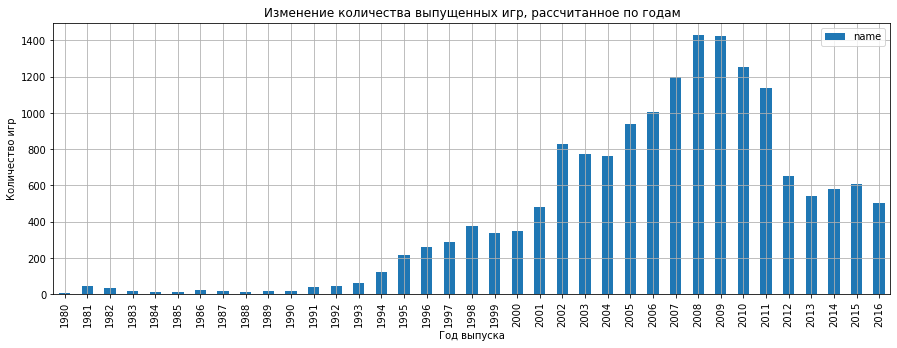

In [28]:
games_per_year.plot(kind='bar', grid = True, figsize=(15,5))
plt.title('Изменение количества выпущенных игр, рассчитанное по годам')
plt.xlabel('Год выпуска')
plt.ylabel('Количество игр')
plt.show()

**Исходя из данных, отображенных на графике, мы можем сделать следующие выводы:**
- С 1980 по 1993 год объемы годового выпуска игр были слишком малы, чтобы в дальнейшем опираться на эти данные при прогнозировании продаж на 2017 год;-
- Начиная с 1992 года начинается неуклонный ежегодный прирост в ежегодном выпуске игр;
- Настоящий пик для игровой индустрии это 2008 и 2009 года. Выпускается больше 1400 различных игр, после чего происходит заметный спад в производстве игр;
- В 2012 году произошел резкий обвал рынка игровой индустрий. Производство игр упало с 1200 экземпляров в год, до 600;*
- Начиная с 2012 года общегодовой выпуск игр существенно не менялся в количественном эквиваленте.
- Таким образом самыми подходящими данными для последующего прогнозирования продаж в 2017 году приходятся на период 2012-2016 годов.

In [29]:
games_on_platform = df.pivot_table(index='platform', values='name', aggfunc='count').sort_values(by = 'name', ascending = False)
print(games_on_platform)

          name
platform      
PS2       2127
DS        2121
PS3       1305
Wii       1286
X360      1232
PSP       1193
PS        1190
PC         957
GBA        811
XB         803
GC         542
3DS        512
PSV        429
PS4        392
N64        316
XOne       247
SNES       239
SAT        173
WiiU       147
2600       116
NES         98
GB          97
DC          52
GEN         27
NG          12
SCD          6
WS           6
3DO          3
TG16         2
PCFX         1
GG           1


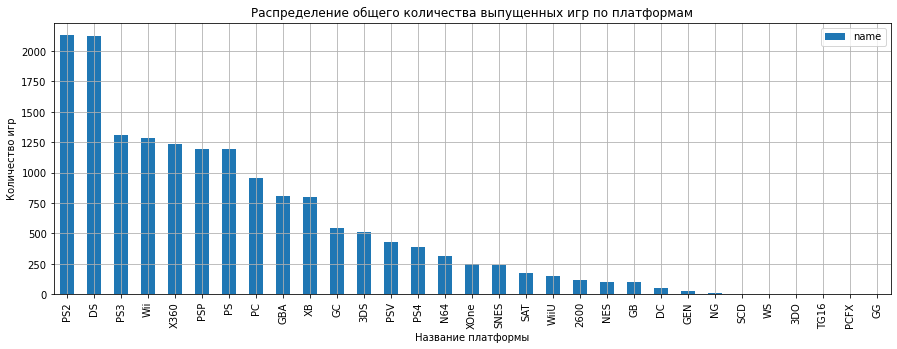

In [30]:
games_on_platform.plot(kind='bar', figsize=(15,5), grid = True)
plt.title('Распределение общего количества выпущенных игр по платформам')
plt.xlabel('Название платформы')
plt.ylabel('Количество игр')
plt.show()

Выберем платформы с наибольшим суммарным количеством выпущенных игр . Такими платформами являются:DS и PS2.Построим сводную таблицу и график распределения количества выпущенных игр по годам для данных платформ:

In [31]:
popular_platform_per_years = (df.query 
('platform == "DS" | platform == "PS2"')
.pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count'))
                              


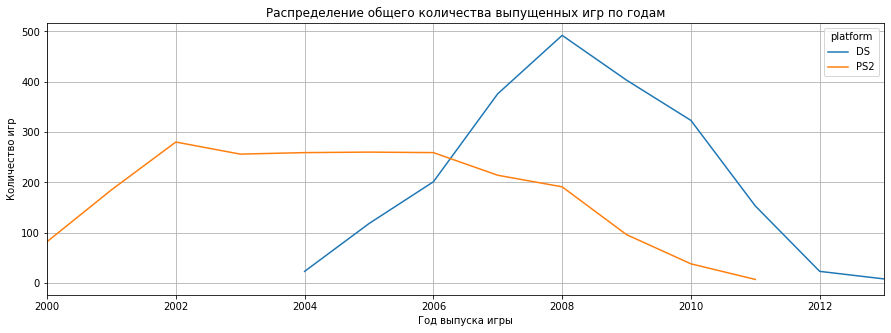

In [32]:
popular_platform_per_years.plot(figsize=(15,5) ,xlim=(2000, 2013), grid=True)
plt.title('Распределение общего количества выпущенных игр по годам')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

**По данным графика мы можем сделать следующие выводы:**
- Средний жизненный цикл платформы составляет 10 лет;
- Пик производства игр для платформы наступает спустя 4-5 лет с момент появления платформы;
- Каждые 4 года появляется новая конкуретная платформа и каждые 2 года одна из платформ уходит с рынка.

 Таким образом, чтобы построить прогноз на 2017 год, нам нужно брать во внимание период с 2012 года. Платформы, которые появились в это время наберут максимальную популярность к 2017 году.

Возьмем данные за актуальный период и построим сводную таблицу, характеризующую распределение суммарного количества выпущенных игр на разных платформах в течение периода с 2012 по 2016 год:

In [33]:
trend_of_platforms = (df.query('year_of_release > 2011')
.pivot_table(index='platform', columns='year_of_release', values='name', aggfunc='count', fill_value = 0)
)
print(trend_of_platforms)

year_of_release  2012  2013  2014  2015  2016
platform                                     
3DS                93    91    80    86    46
DS                 23     8     0     0     0
PC                 61    38    47    50    54
PS3               147   126   108    73    38
PS4                 0    16    75   137   164
PSP               106    54    10     3     0
PSV                53    63   100   110    85
Wii                31    12     6     4     1
WiiU               32    42    31    28    14
X360              106    75    63    35    13
XOne                0    19    61    80    87


**На основании таблицы мы можем сделать следующие выводы:**
- Платформами, у которых к 2016 году наблюдается нисходящий тренд в суммарном выпуске игр, являются 3DS,PS3,PSV,WiiU и X360;
- На платформе PSP в 2016 году не вышло ни одной игры,что говорит об отсутствии спроса на данную консоль;
- Аналогичная картина наблюдается и с платформой DS. Начиная с 2014 года на неё не выходят игры;
- Восходящий тренд востребованности и популярности наблюдается для платформ PC, PS4 и XOne. Особое внимание стоит уделить платформе PS4. За 2016 год 164 новых игры появилось для данной консоли. В сравнении на XOne и PC вышло в два и в три раза меньше игр соответственно. Также хочется отметить уверенный прирост в количестве игр у PS4 по отношению к 2015 году. Суммарно почти на 30 игр больше вышло в 2016 году, тогда как для XOne и PC прирост составил всего 7 и 4 игры соответственно.

 Таким образом при дальнейшем анализе будем использовать данные платформ PS4,XOne и PC. Именно на основании данных об этих платформах можно сделать наиболее точный прогноз на 2017 год.


Для нагрядности отобразим эти три платформы на графике:

<AxesSubplot:xlabel='platform'>

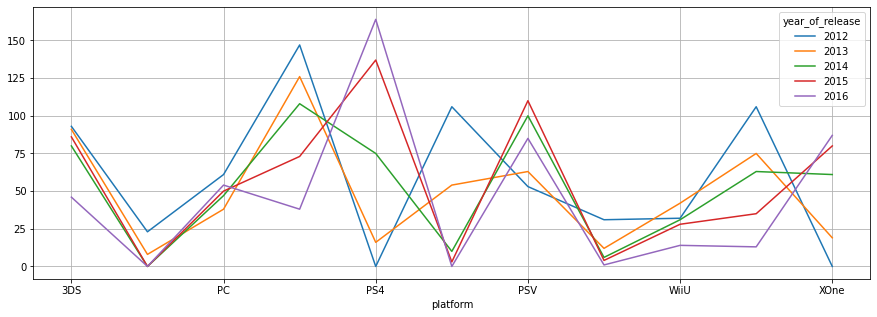

In [34]:
trend_of_platforms.plot(figsize=(15,5), grid=True)


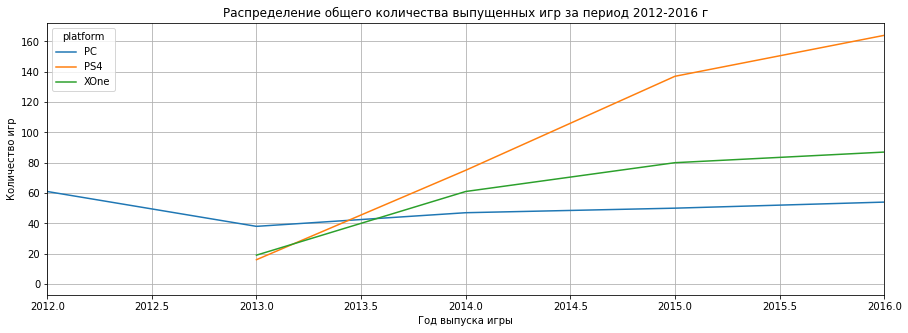

In [35]:
(df.query('platform == "PS4" | platform == "XOne" | platform == "PC"')
 .pivot_table(index='year_of_release', columns='platform', values='name', aggfunc='count')
 .plot(figsize=(15,5), grid=True, xlim=(2012,2016))
)
plt.title('Распределение общего количества выпущенных игр за период 2012-2016 г')
plt.xlabel('Год выпуска игры')
plt.ylabel('Количество игр')
plt.show()

**Таким образом, исходя из данных на графике, мы можем сделать следующий прогноз:**
 - На платформе PC выйдет за год около 60 игр;
 - На платформе XOne - около 90-95 игр;
 - На платформе PS4 значение может достигнуть 180-185 игр, что и делает по прогнозам эту платформу самой востребованной на 2017 год.

Перейдем к рассмотрению глобальных продаж для игр, выпущенных на разных платформах.Для этого построим диаграмму размаха с разбивкой на платформы:

array([<AxesSubplot:title={'center':'sum_of_sales'}, xlabel='platform'>,
       <AxesSubplot:>], dtype=object)

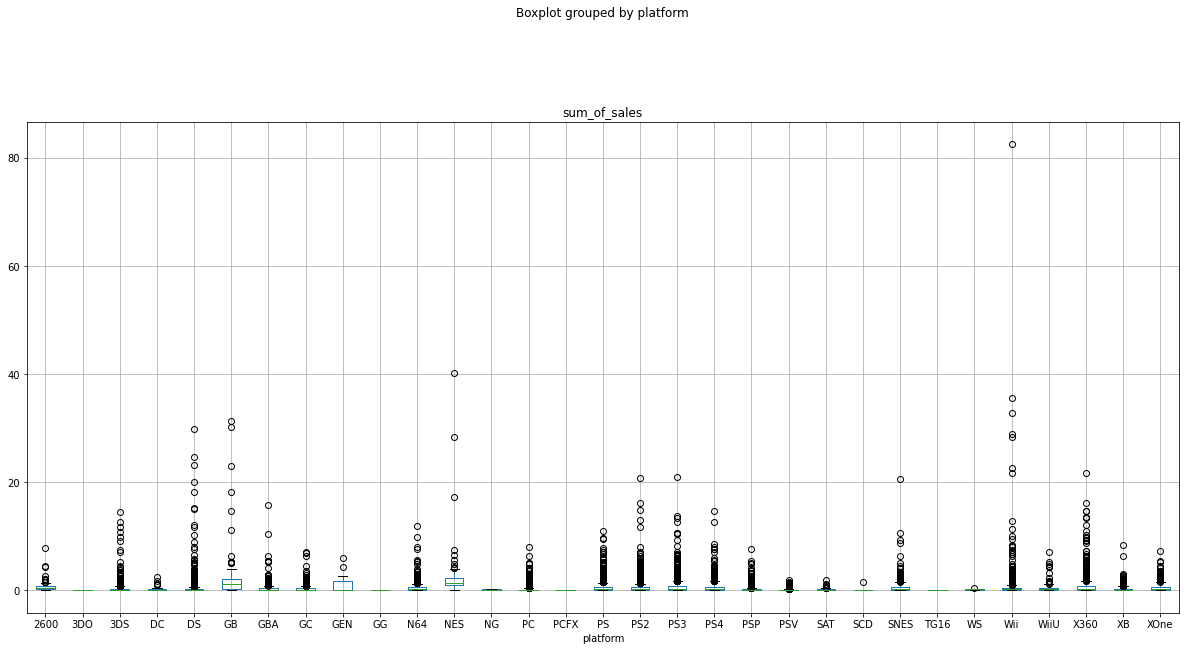

In [36]:
df.boxplot(column = 'sum_of_sales', by = 'platform', layout=(2, 1), figsize=(20,20))

**На основании диаграммы  размаха мы можем сделать следущие выводы:**
 - Данные можно охарактеризовать как крайне не однородные, с сильными выбросами, превышающие медианные значения в десятки раз;
 - Максимальный тираж, который когда-либо был продан в мире, составил 75 млн. копий. Данное значение было зафиксировано у игры на платформе Wii;
 - На втором месте по продаваемости в мире некоторая игра, разработанная для платформы NES. Проданный тираж составил около 40 млн. копий;
 - На третьем и четвертом месте находятся соответственно игры с платформы Wii и GB общее количество копий которых составило около 30 млн. копий;
 

---

Однако, перед нами стоит задача сделать прогноз на 2017 год, поэтому ограничим период диаграммы размаха периодом начиная с 2012 года:

array([<AxesSubplot:title={'center':'sum_of_sales'}, xlabel='platform'>,
       <AxesSubplot:>], dtype=object)

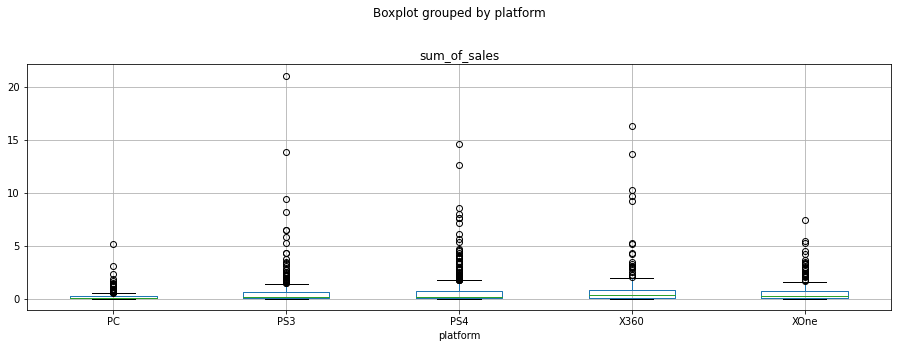

In [37]:
(df.query('year_of_release>2011 & (platform == "PS4" | platform == "PS3" | platform == "PC" | platform == "XOne" | platform == "X360" )')
 .boxplot(column = 'sum_of_sales', by = 'platform', layout=(2, 1), figsize=(15,10)))

Данные крайне неоднородны и характерны большими выбросами, по графику не представляется оценить основные статистики вроде 25% и 75% квантилей, а также медиану. Ограничим график по оси Y значением ylim равным 5 и снова проанализирируем:

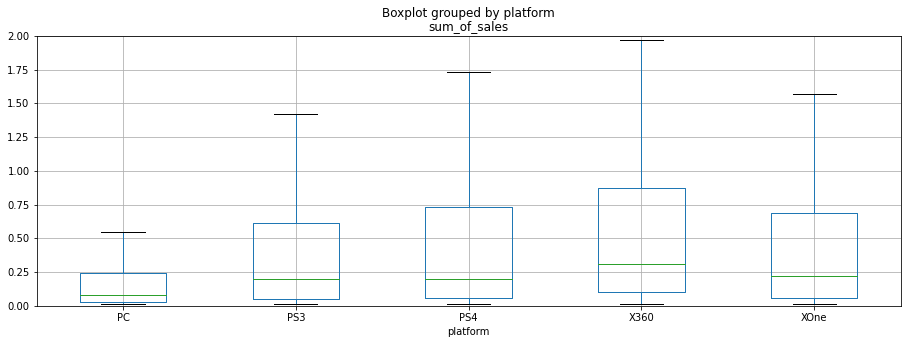

In [38]:
fig, ax = plt.subplots(figsize=(15,5))
(df.query('year_of_release>2011 & (platform == "PS4" | platform == "PS3" | platform == "PC" | platform == "XOne" | platform == "X360" )')
 .boxplot(ax = ax,sym = '' ,column = 'sum_of_sales', by = 'platform', layout=(2, 1)))
ymax = 2
ymin = 0
ax.set_ylim([ymin,ymax])
plt.show()

**По данным диаграммы размаха для заданного периода по выделенным платформам мы можем сделать следующие выводы:**
 - Данные очень неоднородны и характерны большими выбросами;
 - Максимальный проданный тираж игры равный более 20 млн. копий принадлежит платформе PS3;
 - Максимальный проданный тираж игры для платформы X360 равен 17 млн. копий;
 - Максимально проданное количество копий для платформы PS4 составило 15 млн. копий, для XOne - около 7млн копий, для PC - всего 5 млн. копий;
 - Медианные значения всех отобранных платформ не привышают значение в 0.3 млн копий, а значение 75% квартиля не превышает значение в 2 млн копий
 

---

    Обратимся к данным о самой популярной платформе периода  с 2012 по 2016 год - платформе PS4. 
    Необходимо выяснить как влияют на продажи отзывы критиков и пользователей.
    Для этого построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами:

<AxesSubplot:xlabel='critic_score', ylabel='sum_of_sales'>

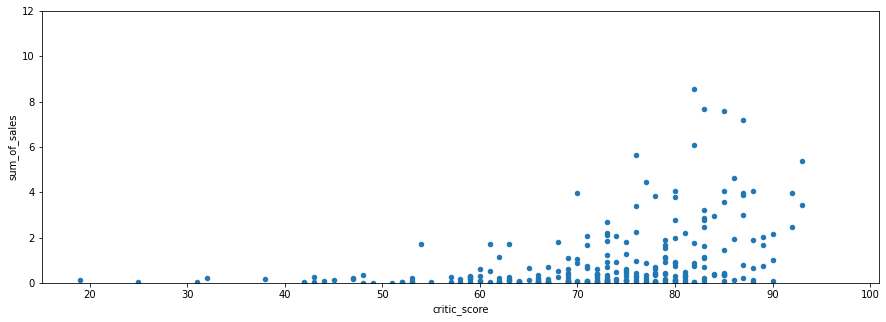

In [39]:
df.query('platform == "PS4" ').plot(y='sum_of_sales', x='critic_score', kind='scatter', ylim=(0,12), figsize=(15,5))

In [40]:
print('Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы" критиков" =',
      round(df.query('platform == "PS4"')['sum_of_sales'].corr(df.query('platform == "PS4"')['critic_score']),2))

Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы" критиков" = 0.41


<AxesSubplot:xlabel='user_score', ylabel='sum_of_sales'>

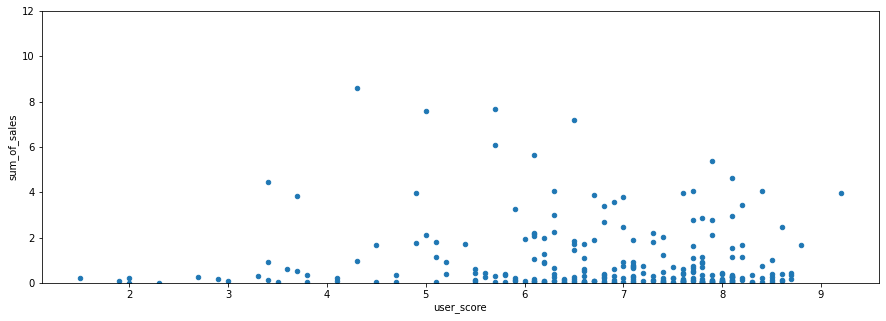

In [41]:
df.query('platform == "PS4" ').plot(y='sum_of_sales', x='user_score', kind='scatter', ylim=(0,12), figsize=(15,5))

In [42]:
(print('Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" = '
      , round(df.query('platform == "PS4"')['sum_of_sales'].corr(df.query('platform == "PS4"')['user_score']), 2)))

Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" =  -0.03


**По результатам построения диаграмм рассеивания и расчета коэффициентов корреляции можно провести промежуточные итоги:**
- Отзывы критиков и пользователей практически не оказывают никакого влияния на продажи либо имеют эффект, но крайне слабый;
- Коэффициент корреляции Пирсона между общим числом проданных копий и оценкой критиков равен 0.41. Корреляция выше чем между пользовательскими оценками и продажами. Оценки критиков оказывают некоторое влияние на продажи игр;
- Коэфициент корреляции между параметрами общий тираж проданных копий и оценками пользователей равен -0.03. Из чего можно сделать вывод о том, что данные параметры практически не оказывают никакого влияния друг на друга.

Рассмотрим еще несколько платформ, построим для них диаграммы рассеяния и коэффициенты корреляции между отзывами критиков и продажами, а также между отзывами пользователей и продажами:

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе 3DS


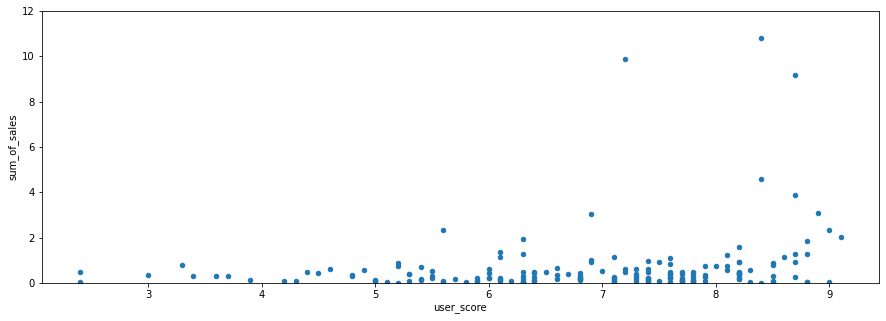

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе PS3


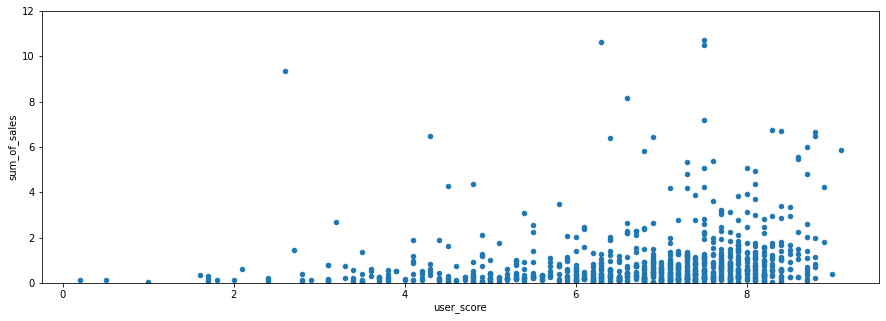

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе PC


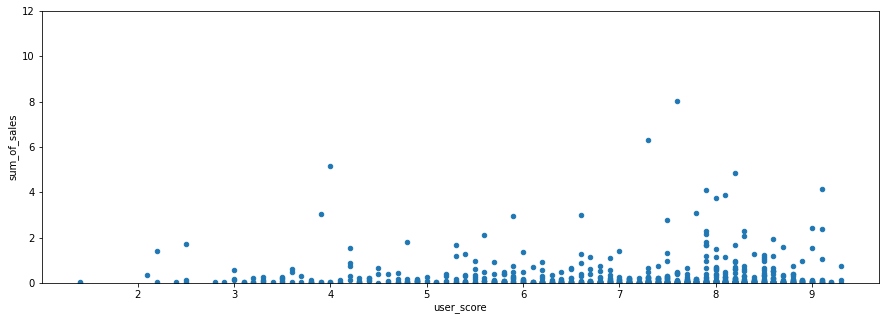

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе XOne


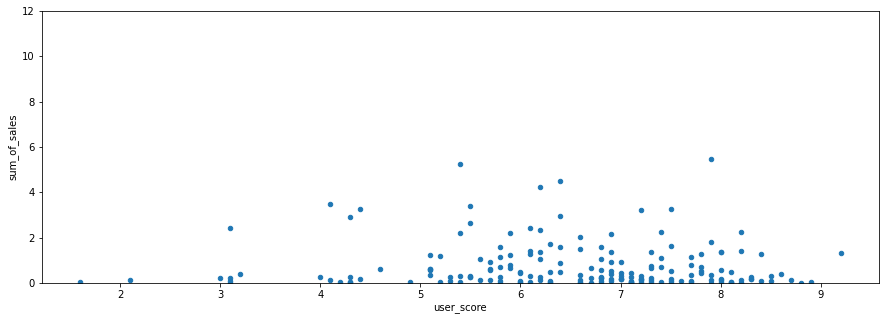

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе X360


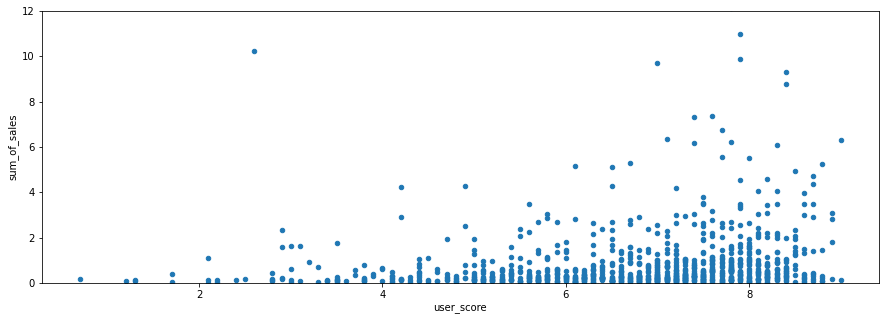

In [43]:
some_platforms = ["3DS","PS3","PC","XOne","X360"]
for d in some_platforms:
    df.query('platform == @d').plot(y='sum_of_sales', x='user_score', kind='scatter', ylim=(0,12), figsize=(15,5))
    print('                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе', d)
    plt.show()

Как мы можем наблюдать диаграммы рассеивания схожи с диаграммой рассеивания платформы PS4 по параметрам оценка критика и продажи. Посчитаем коэффициент корреляции, чтобы убедиться в отсутствии взаимосвязи между параметрами:

In [44]:
for d in some_platforms:
    (print('Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе', d,'= '
      , round(df.query('platform == @d')['sum_of_sales'].corr(df.query('platform == @d')['user_score']), 2)))

Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе 3DS =  0.22
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе PS3 =  0.13
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе PC =  0.01
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе XOne =  -0.07
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе X360 =  0.11


Все коэффициенты корреляции не превышают значение в 0.25, что свидетельствует об очень слабой взаимосвязи параметров оценка пользозователя и продажи. Построим диаграммы рассеивания для параметров оценка критика и продажи аналогичным образом:

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе 3DS


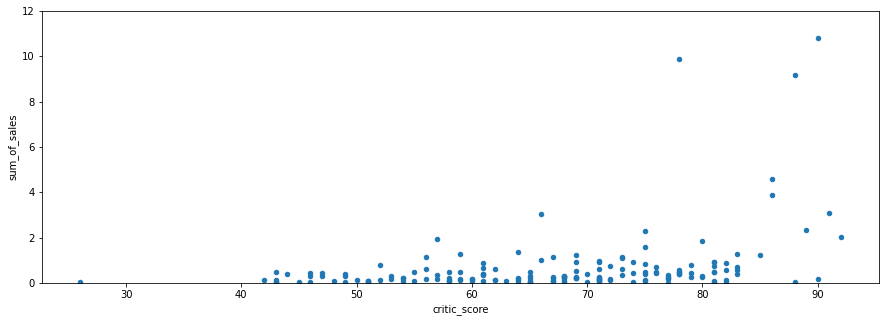

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе PS3


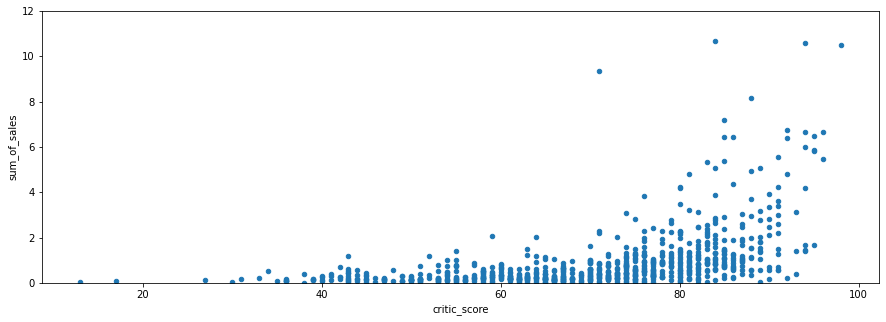

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе PC


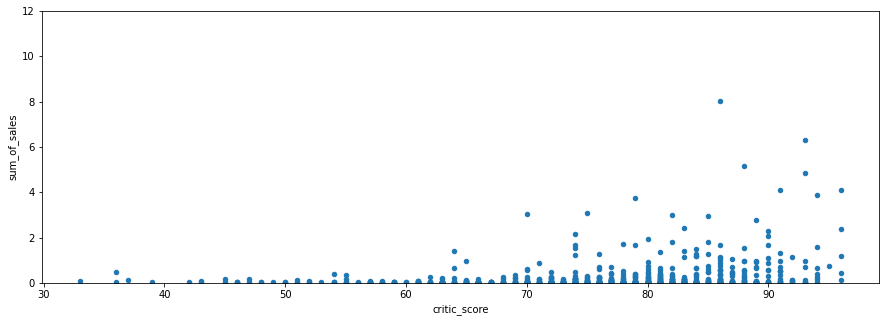

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе XOne


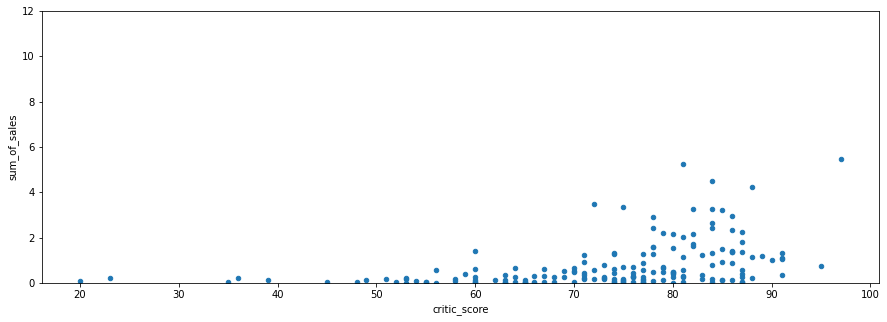

                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе X360


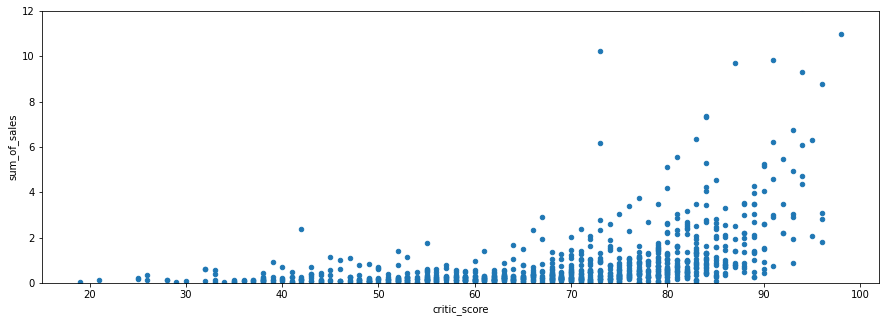

In [45]:
some_platforms = ["3DS","PS3","PC","XOne","X360"]
for d in some_platforms:
    df.query('platform == @d').plot(y='sum_of_sales', x='critic_score', kind='scatter', ylim=(0,12), figsize=(15,5))
    print('                   Диаграмма рассеивания между пользовательскими оценками и продажами на платформе', d)
    plt.show()

Как мы можем наблюдать диаграммы рассеивания схожи с диаграммой рассеивания платформы PS4 по параметрам оценка критика и продажи. Посчитаем коэффициент корреляции, чтобы убедиться в отсутствии взаимосвязи между параметрами:

In [46]:
for d in some_platforms:
    (print('Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе', d,'= '
      , round(df.query('platform == @d')['sum_of_sales'].corr(df.query('platform == @d')['critic_score']), 2)))

Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе 3DS =  0.35
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе PS3 =  0.43
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе PC =  0.26
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе XOne =  0.42
Коэффициент корреляции Пирсона для пары параметров "Продажи-отзывы пользователей" на платформе X360 =  0.39


Мы можем наблюдать, что корреляция между оценками критиков и продажами значительно выше корреляции между пользовательскими оценками и продажами. Коэффициент варьируется от 0.26 до 0.43 в зависимости от платформы. Таким образом можем заключить, что оценки критиков имеют некоторое несильное влияние на продажи игр.

Таким образом эмпирическим путем мы установили следующее:
- Корреляция между пользовательскими оценками слишком мала, чтобы считать, что оценки пользователей оказывают влияние на продажи игры;
- Корреляция между оценками критиков и продажами значительно выше и можно утверждать, что при выборе отдается предпочтение играм с более высоким рейтингом, однако зависимость явно не имеет линейный характер

---

Рассмотрим общее распределение игр по жанрам, а также рассмотрим как распределяется прибыль между играми разных жанров:

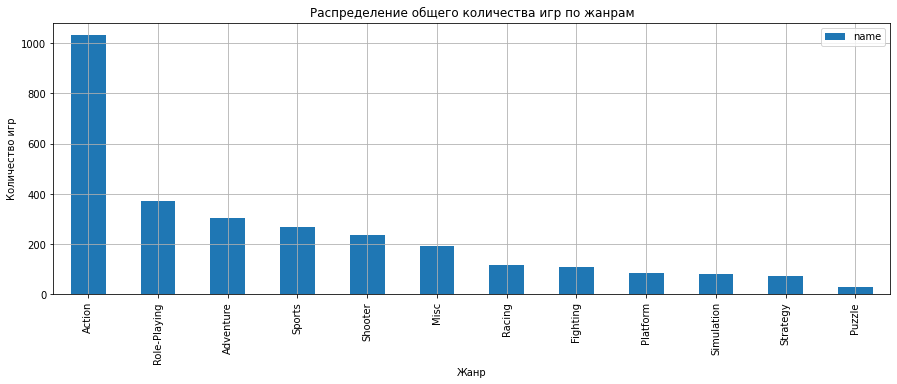

In [47]:
(df.query('year_of_release > 2011').pivot_table(index='genre', values='name', aggfunc='count')
.sort_values(by = 'name', ascending=False) 
 .plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества игр по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество игр')
plt.show()

На графике мы можем наблюдать, что самым популярным среди игр является жанр Action. Следом идут игры из категории Role-Playing и замыкает тройку лидеров игры жанра Adventure. Самыми непопулярными жанрами оказались категории Puzzle и Strategy.Можно предположить, что в соответствии с этим рейтингом жанров будет распределяться и суммарная прибыль.
Построим столбчатую диаграмму распределения 

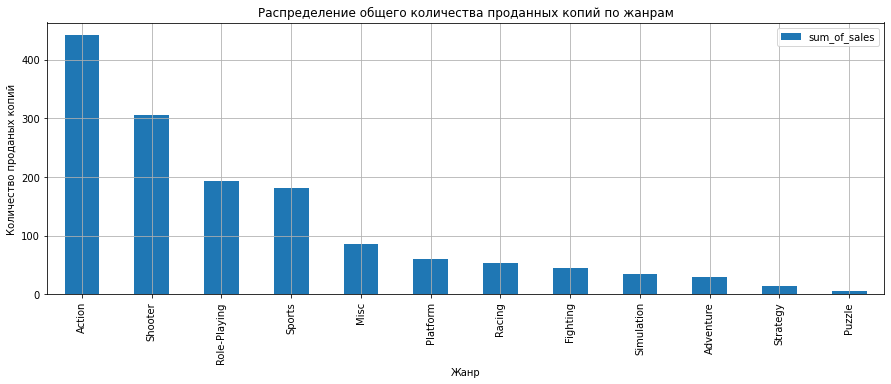

In [48]:
(df.query('year_of_release >2011').pivot_table(index='genre', values='sum_of_sales', aggfunc='sum')
 .sort_values(by = 'sum_of_sales', ascending=False)
 .plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Количество проданых копий')
plt.show()

Мы можем наблюдать то, что по общим продажам игры в жанре Action занимают уверенное первое место с общим количеством копий свыше 400 млн. На втором месте идет жанр Shooter с количеством копий около 300 млн., на третьем и четвертом местах жанры Role-Playing и Sports с количеством копий почти в 200 млн. Замыкает пятерку лидеров жанр Misc, число копий которого около 100 млн.
Что касается самых не продаваемых жанров, то к ним относятся в первую очередь игры из категории Puzzle и Strategy. Cледом идут категории Adventure, Simulation и Fighting.Однако,прежде чем делать выводы о потенциально прибыльном жанре игры и жанре с самыми низкими продажами, стоит рассмотреть разброс значений внутри каждой из групп. Построим диаграмму разброса для каждой из категорий:

<AxesSubplot:xlabel='genre', ylabel='sum_of_sales'>

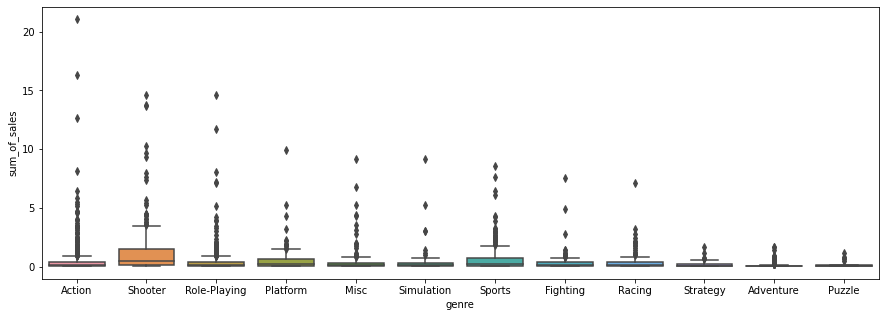

In [97]:
fig, axes = plt.subplots(figsize =(15,5))
sns.boxplot(x=df.query('year_of_release > 2011')['genre'], y=df.query('year_of_release > 2011')['sum_of_sales'])

Данные характеризуются достаточно большими выбросами, что затрудняет визуально оценить важные статистики. Ограничим ось Y значением 4:

(0.0, 4.0)

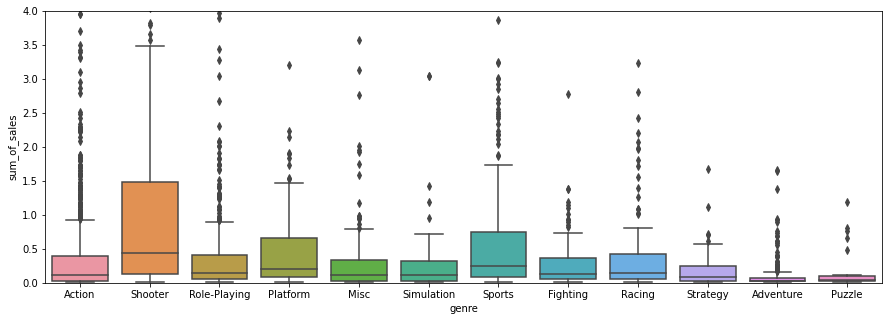

In [104]:
fig, axes = plt.subplots(figsize =(15,5))
sns.boxplot(x=df.query('year_of_release > 2011')['genre'], y=df.query('year_of_release > 2011')['sum_of_sales'])
ymax = 4
ymin = 0
axes.set_ylim([ymin,ymax])

Изменив ограничения по оси Y, мы сделали график более информативным. Дополнительно посчитаем медианные значения для каждой из категорий:

In [116]:
(df.query('year_of_release > 2011').pivot_table(index='genre', values='sum_of_sales', aggfunc='median')
.sort_values(by='sum_of_sales', ascending=False))

,sum_of_sales
genre,
Shooter,0.440
Sports,0.240
Platform,0.210
Role-Playing,0.140
Racing,0.140
Fighting,0.130
Action,0.120
Misc,0.120
Simulation,0.120


**На основании посчитанных данных и графиков мы можем сделать следующие выводы:**
- Cамое большое медианное значение проданных копий относится к категории Shooter;
- Cамое большое значение 75% квантиля также принадлежит играм в жанре Shooter; 
- Несмотря на то, что по суммарным продажам жанр Action превышает продажи других жанров, такие значения были достигнуты в основном за счет выбросов, - отдельно взятых игр, которые продавались в большом количестве.Количество непопулярных игр данного жанра настолько велико, что медианное значение продаж равно всего 120 тыс.копий. В сравнении у категории Fighting, чьи суммарные продажи около 50 млн.копий имеет более высокое медианное значение продаж равное 130 тыс. копий.
- Продажа игр жанра Shooter будет стабильно приносить высокий доход за счет высокого значения медианы;
- На втором месте по надежности потенциального дохода - игры категории Sports с медианным значением проданных копий равным 240 тыс;
- Жанры с самыми низкими продажами и с самым низким медианным значением - Adventure, Puzzle,Strategy и Simulation. 

---

## Cоставление портрета пользователя  по каждому региону

**В рамках данного этапа нашей исследовательской работы перед нами стоят три основные задачи:**
- Определить топ-5 популярных платформ для каждого региона. Описать различия в долях продаж;
- Определить топ-5 популярных жанров по каждому региону. Исследовать причины различий между регионами;
- Выяснить влияет ли рейтинг ESRB на продажи в отдельном регионе.

---

Начнем с составления рейтинга популярности платформ по регионам. Для этого построим столбчатые диаграммы, отсортируем их по убыванию значений, выберем топ-5 и сравним значения:

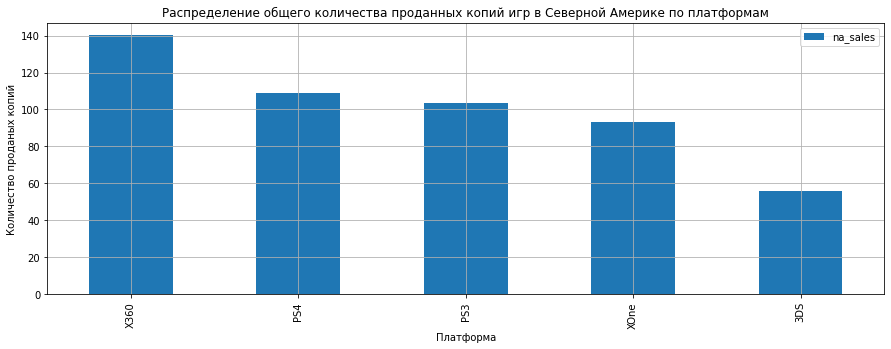

In [40]:
(df.query('year_of_release > 2011').pivot_table(index='platform', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в Северной Америке по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**На основании данного графика мы можем определить топ-5 платформ в Северной Америке:**
1. **X360**;
2. **PS4**;
3. **PS3**;
4. **XOne**;
5. **3DS**

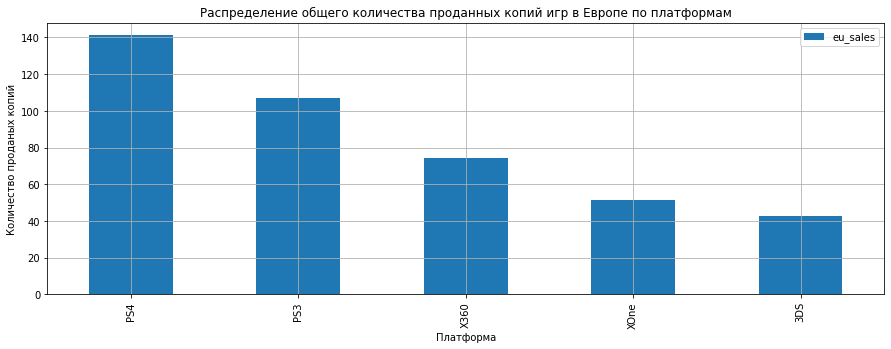

In [41]:
(df.query('year_of_release > 2011').pivot_table(index='platform', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в Европе по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**На основании данного графика топ-5 платформ в Европе:**
1. **PS4**;
2. **PS3**;
3. **X360**;
4. **XOne**;
5. **3DS**

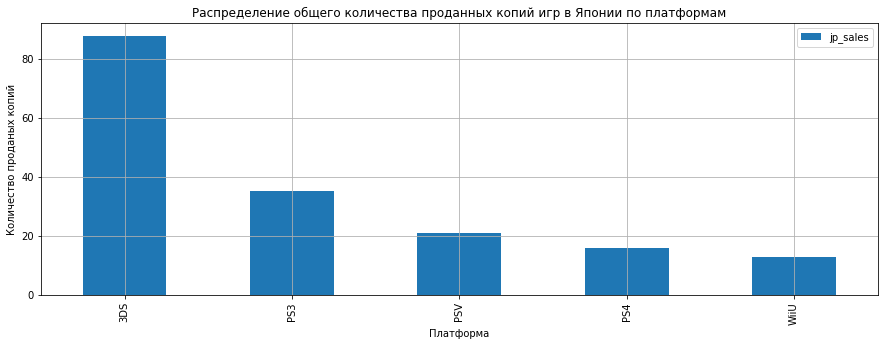

In [42]:
(df.query('year_of_release > 2011').pivot_table(index='platform', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в Японии по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**Топ-5 платформ в Японии:**
1. **3DS**;
2. **PS3**;
3. **PSV**;
4. **PS4**;
5. **Wii**

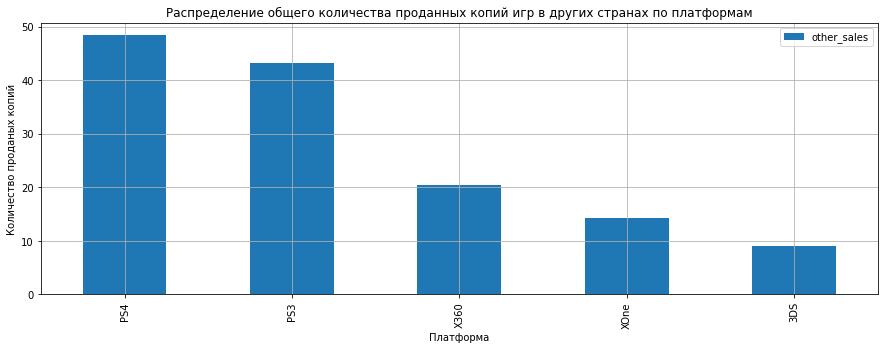

In [43]:
(df.query('year_of_release > 2011').pivot_table(index='platform', values='other_sales', aggfunc='sum')
 .sort_values(by='other_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в других странах по платформам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**Топ-5 платформ для остальных стран мира:**
1. **PS4**;
2. **PS3**;
3. **X360**;
4. **XOne**;
5. **3DS**

Для удобства создадим таблицу из топ-5 платформ в разных регионов и проанализируем её:

In [44]:
data = [['X360  ', 'PS4   ', '3DS    ', 'PS4      '],
       ['PS4  ', 'PS3   ', 'PS3    ', 'PS3      '],
       ['PS3  ', 'X360   ', 'PSV    ', 'X360      '],
       ['XOne  ', 'XOne   ', 'PS4    ', 'XOne      '],
       ['3DS  ', '3DS   ', 'Wii    ', '3DS      ']
       ]
columns=['Северная Америка', 'Европа', 'Япония', 'Другие страны']
index= [1, 2, 3 ,4 ,5]
new_tab = pd.DataFrame(data, index, columns)
print('        Топ-5 платформ в разных регионах мира \n\n',new_tab)

        Топ-5 платформ в разных регионах мира 

   Северная Америка   Европа   Япония Другие страны
1           X360     PS4     3DS         PS4      
2            PS4     PS3     PS3         PS3      
3            PS3    X360     PSV        X360      
4           XOne    XOne     PS4        XOne      
5            3DS     3DS     Wii         3DS      


На основании посчитанных данных мы можем сделать следующие выводы:
- Предпочтения покупателей из Европы полностью совпадают с предпочтениями региона "другие страны";
- Платформа PS3 входит в топ-3 в каждом из регионов;
- Япония - это единственный регион, где платформа Wii и PSV  входят в топ-5 популярных платформ, тогда как платформы X360 и Xone не вошли в этот топ-5.

---

Составим рейтинг популярности жанров по регионам. Для этого построим столбчатые диаграммы, отсортируем их по убыванию значений, выберем топ-5 и сравним значения:

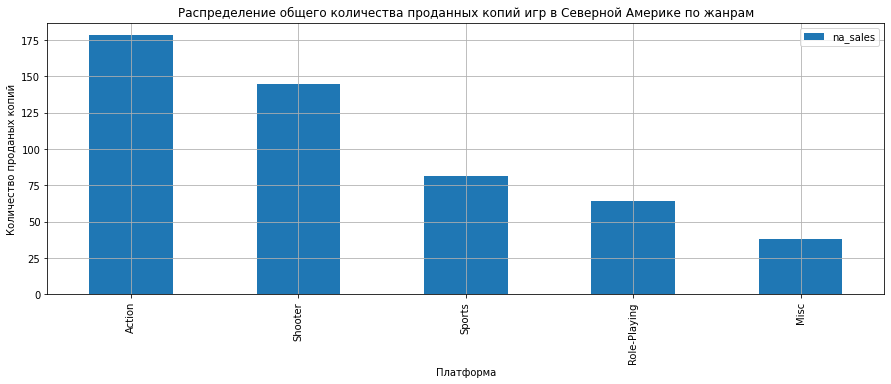

In [45]:
(df.query('year_of_release > 2011').pivot_table(index='genre', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в Северной Америке по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**На основании данного графика мы можем определить топ-5 популярных жанров в Северной Америке:**
1. **Action**;
2. **Shooter**;
3. **Sports**;
4. **Role-Playing**;
5. **Misc**

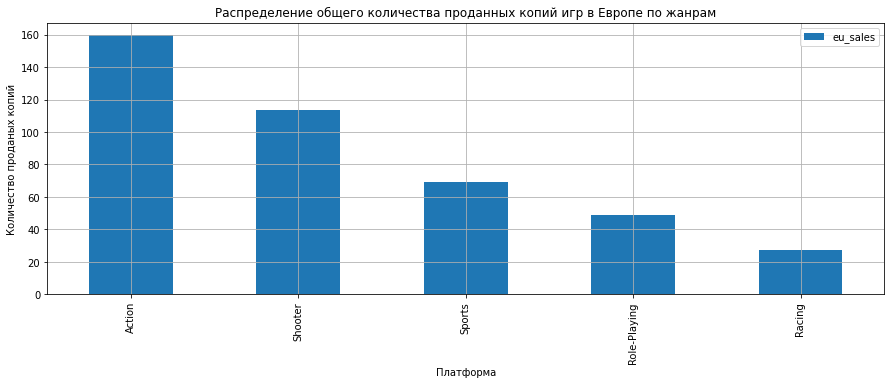

In [46]:
(df.query('year_of_release > 2011').pivot_table(index='genre', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в Европе по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**На основании данного графика мы можем определить топ-5 популярных жанров в Европе:**
1. **Action**;
2. **Shooter**;
3. **Sports**;
4. **Role_playing**;
5. **Racing**

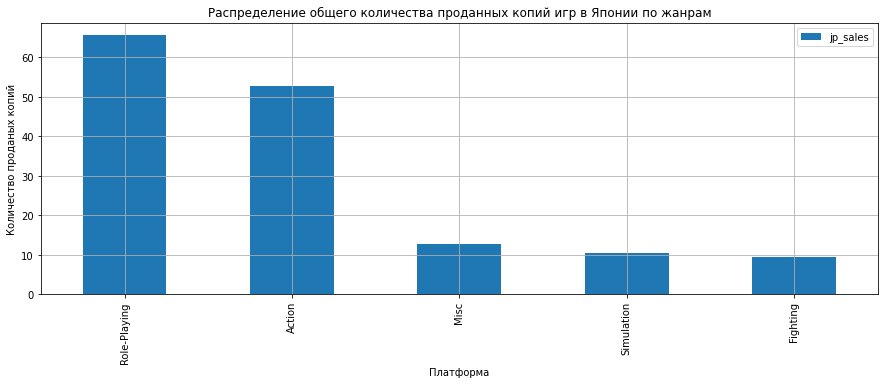

In [47]:
(df.query('year_of_release > 2011').pivot_table(index='genre', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в Японии по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**На основании данного графика мы можем определить топ-5 популярных жанров в Японии:**
1. **Role-playing**;
2. **Action**;
3. **Misc**;
4. **Simulation**;
5. **Fighting**

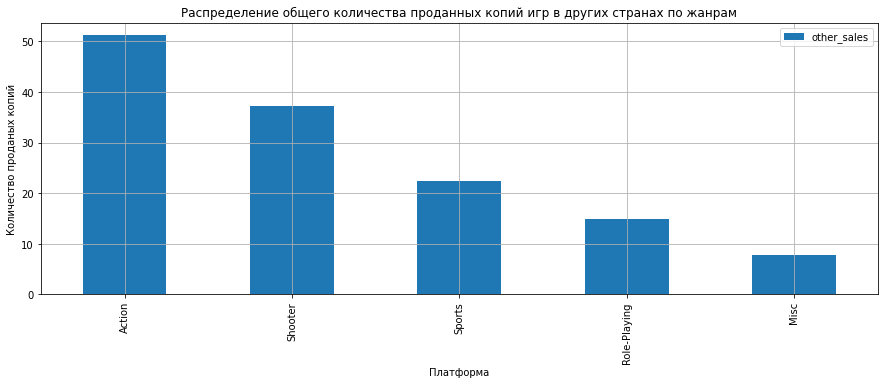

In [48]:
(df.query('year_of_release > 2011').pivot_table(index='genre', values='other_sales', aggfunc='sum')
 .sort_values(by='other_sales', ascending= False)
 .head().plot(kind='bar', figsize=(15,5), grid = True))
plt.title('Распределение общего количества проданных копий игр в других странах по жанрам')
plt.xlabel('Платформа')
plt.ylabel('Количество проданых копий')
plt.show()

**На основании данного графика мы можем определить топ-5 популярных жанров в других странах:**
1. **Action**;
2. **Shooter**;
3. **Sports**;
4. **Role_playing**;
5. **Misc**

Для удобства создадим таблицу из топ-5 жанров в разных регионов и проанализируем её:

In [49]:
data_genres = [['Action ', 'Action  ', 'Role-playing   ', 'Action   '],
       ['Shooter ', 'Shooter  ', 'Action   ', 'Shooter   '],
       ['Sports ', 'Sports  ', 'Misc   ', 'Sports   '],
       ['Role-playing ', 'Role-Playing  ', 'Simulation   ', 'Role-Playing   '],
       ['Misc ', 'Racing  ', 'Fighting   ', 'Misc   ']
       ]
columns=['Северная Америка', 'Европа', 'Япония', 'Другие страны']
index= [1, 2, 3 ,4 ,5]
popular_genres = pd.DataFrame(data_genres, index, columns)
print('        Топ-5 жанров в разных регионах мира \n\n',popular_genres)


        Топ-5 жанров в разных регионах мира 

   Северная Америка          Европа           Япония    Другие страны
1          Action         Action    Role-playing           Action   
2         Shooter        Shooter          Action          Shooter   
3          Sports         Sports            Misc           Sports   
4    Role-playing   Role-Playing      Simulation     Role-Playing   
5            Misc         Racing        Fighting             Misc   


На основании полученных данных мы можем сделать следующие выводы:
- Предпочтения в выборе жанров у покупателей из Cеверной Америки и из других стран идентичны;
- Предпочтения в выборе жанров в Европе, Северной Америке и других странах схожи, отличается только пятое место в топ-5: в Северной Америке и других странах данное место занимает жанр Misc, а в Европе - Racing;
- Жанры Action и Sports входят в топ-3 по всем регионам, с учетом того, что в Северной Америке, Европе и других странах данные жанры занимают первые и вторые места соответственно;
- Япония - единственный регион, в котором жанр Role-playing занимаем первое место в топ-5 популярных жанров. Также среди топ-5 предпочитаемых жанров встречаются такие как Simulation и Fighting;

---

Проанализируем почему существует заметная разница между топ-5 Японии и остальных регионов. Для этого посмотрим топ-5 платформ, которые больше остальных выпустили игр в жанраз из топ-5 по Японии:

In [50]:
(df.query('year_of_release > 2011')
 .query('genre == "Role-Playing" | genre == "Simulation" | genre == "Fighting" | genre == "Action" | genre == "Misc" ')
 .pivot_table(index='platform', values='name', aggfunc='count').sort_values(by='name', ascending=False).head())

,name
platform,
3DS,309
PS3,297
PSV,269
PS4,239
X360,154


На основании данных мы можем сделать вывод о том, что предположительно платформы 3DS, PS3, PSV и PS4 так популярны в Японии по причине того, что на них представлены в достаточно большом количестве популярные среди игроков из Японии жанров.

---

Перейдем к следующей задачи нашего этапа исследования. Проверим как влияет рейтинг ESRB на продажи в каждом отдельном регионе. Для этого построим столбчатую диаграмму и посмотрим распределение общего количества проданных копий по категориям рейтинга:

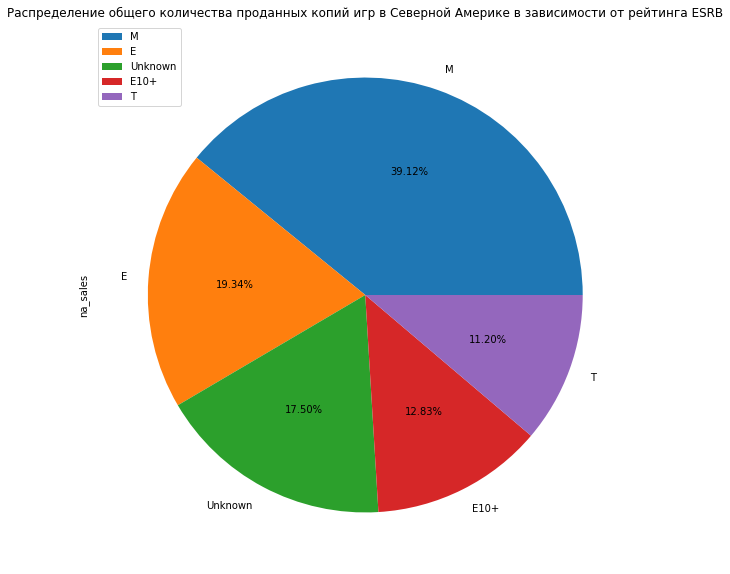

In [51]:
(df.query('year_of_release > 2011').pivot_table(index='rating', values='na_sales', aggfunc='sum')
 .sort_values(by='na_sales', ascending=False)
 .plot(kind='pie', figsize=(20,10),subplots=True, autopct='%1.2f%%'))
plt.title('Распределение общего количества проданных копий игр в Северной Америке в зависимости от рейтинга ESRB')
plt.show()

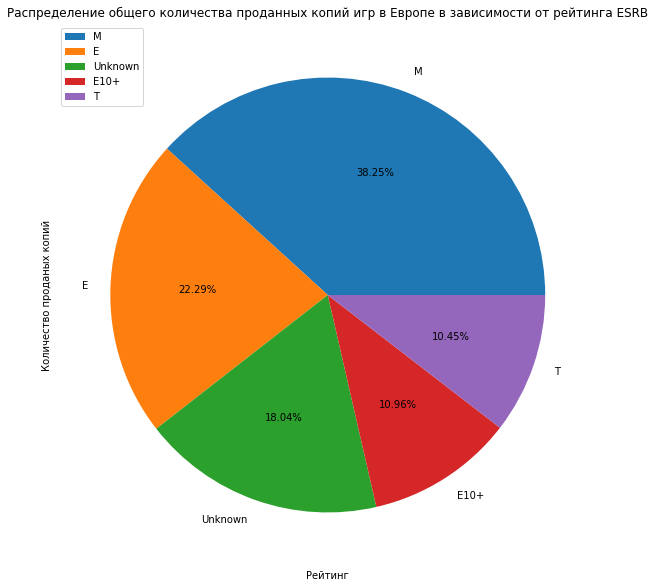

In [52]:
(df.query('year_of_release > 2011').pivot_table(index='rating', values='eu_sales', aggfunc='sum')
 .sort_values(by='eu_sales', ascending=False)
 .plot(kind='pie', figsize=(20,10), subplots=True, autopct='%1.2f%%'))
plt.title('Распределение общего количества проданных копий игр в Европе в зависимости от рейтинга ESRB')
plt.xlabel('Рейтинг')
plt.ylabel('Количество проданых копий')
plt.show()

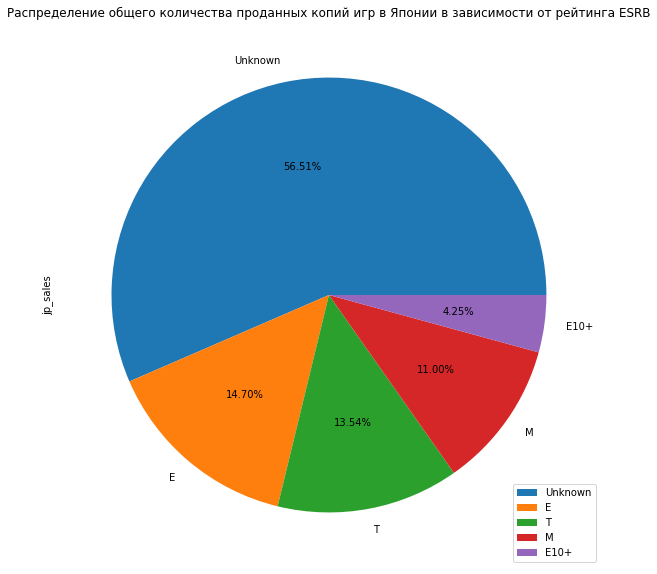

In [53]:
(df.query('year_of_release > 2011').pivot_table(index='rating', values='jp_sales', aggfunc='sum')
 .sort_values(by='jp_sales', ascending=False)
 .plot(kind='pie', figsize=(20,10), subplots=True, autopct='%1.2f%%'))
plt.title('Распределение общего количества проданных копий игр в Японии в зависимости от рейтинга ESRB')
plt.show()

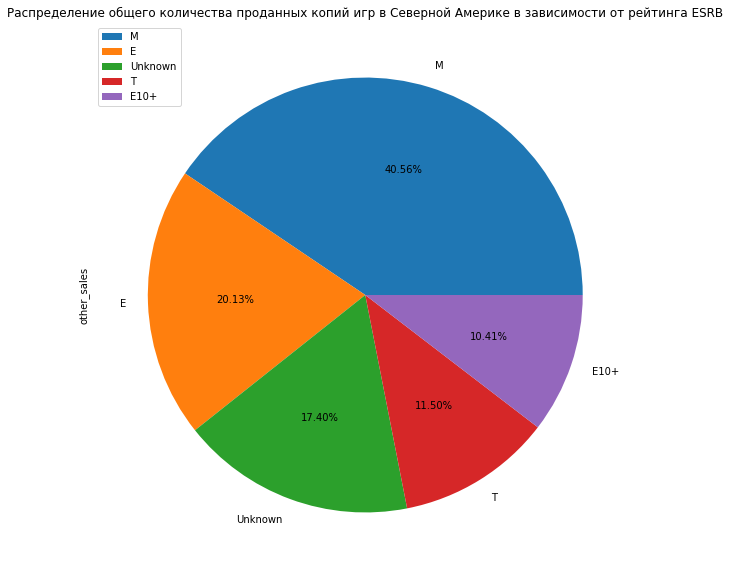

In [54]:
(df.query('year_of_release > 2011').pivot_table(index='rating', values='other_sales', aggfunc='sum')
 .sort_values(by='other_sales', ascending=False)
 .plot(kind='pie', figsize=(20,10), subplots=True, autopct='%1.2f%%'))
plt.title('Распределение общего количества проданных копий игр в Северной Америке в зависимости от рейтинга ESRB')
plt.show()

## **На основании графиков мы можем сделать следующие выводы:**
- Около 40% жителей Северной Америки, Европы и других стран предпочитают приобретать игры с возрастной категорией M, около 20% жителей - игры из категории E, около 18% - игры из категории Unknown, 20% приблизительно поровну делят между собой категории T и E10+;
- Анализируя диаграмму распределения игр по возрастным категориям можно однозначно сделать вывод, что игроки из Японии предпочитают игры из Японии и возможно из Европы. Об этом свидетельствует достаточно большой процент (56,5%) игр из категории Unknown. К категории E относится 15% игр, к категории T - 13,5%, к категории M - 11% и к категории E10+ только 4%. Можно предположить, что если мы получим данные об японской и европейской классификации игр по возрастным ограничениям, то мы получим приблизительно схожее распределение в предпочтениях к играм по возрастным категориям.

---

## Проверка гипотез

**На данном этапе нам необходимо проверить две гипотезы:**
1. Можно ли утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы?
2. Можно ли утверждать, что средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные?

---

### Можно ли утверждать, что средние пользовательские рейтинги платформ Xbox One и PC одинаковы?

**Нулевая гипотеза(H0):** *средние пользовательские рейтинги платформ Xbox One и PC одинаковы*;

**Альтернативная гипотеза(H1):** *средние пользовательские рейтинги платформ Xbox One и PC разные*;

**Пороговое значение alpha:** 0.01

Перед нами стоит задача проверки двусторонней гипотезы:

Создадим две выборки, необходимые для теста:

In [55]:
xone_user_score = df.query('year_of_release > 2011').query('platform == "XOne"')['user_score'].dropna()
pc_user_score = df.query('year_of_release > 2011').query('platform == "PC"')['user_score'].dropna()

Оценим размер и равенство двух выборок, чтобы верно задать значение параметра *equal_var*:

In [56]:
xone_user_score.describe()

count    182.000000
mean       6.521429
std        1.380941
min        1.600000
25%        5.800000
50%        6.800000
75%        7.500000
max        9.200000
Name: user_score, dtype: float64

In [57]:
pc_user_score.describe()

count    206.000000
mean       6.428641
std        1.664465
min        1.400000
25%        5.500000
50%        6.800000
75%        7.700000
max        9.300000
Name: user_score, dtype: float64

Выборка с данными о пользовательских оценках на платформе PC несколько превосходит по размеру выборку с оценками по платформе xone, поэтому будет целесообразным присвоить параметру equal_var значение False. Приступим к тесту на проверку двусторонней гипотезы.

In [58]:
alpha = 0.01
results = st.ttest_ind(xone_user_score, pc_user_score, equal_var = False)

print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.5489537965134912
Не получилось отвергнуть нулевую гипотезу


Таким образом гипотеза о равенстве средних пользовательских рейтингах Xbox One и PC не отвергается.

---

### Можно ли утверждать, что средние пользовательские рейтинги жанров Action  и Sports  разные?

**Альтернативная гипотеза(H1):** *средние пользовательские рейтинги жанров Action и Sports разные*;

**Нулевая гипотеза(H0):** *средние пользовательские рейтинги жанров Action и Sports одинаковы*;

**Пороговое значение alpha:** 0.01

Перед нами стоит задача проверки двусторонней гипотезы:

Создадим две выборки, необходимые для теста:

In [59]:
from scipy import stats as st
action_user_score = df.query('year_of_release > 2011').query('genre == "Action"')['user_score'].dropna()
sports_user_score = df.query('year_of_release > 2011').query('genre == "Sports"')['user_score'].dropna()



Оценим размер и равенство двух выборок, чтобы верно задать значение параметра equal_var:

In [60]:
action_user_score.describe()

count    524.000000
mean       6.824427
std        1.373198
min        1.600000
25%        6.275000
50%        7.100000
75%        7.800000
max        9.100000
Name: user_score, dtype: float64

In [61]:
sports_user_score.describe()

count    195.000000
mean       5.455897
std        1.738646
min        0.200000
25%        4.300000
50%        5.700000
75%        6.800000
max        8.800000
Name: user_score, dtype: float64

Выборка с данными о пользовательских оценках жанра action значительно превосходит по размеру выборку с оценками по жанру Sports, поэтому будет целесообразным присвоить параметру equal_var значение False. Приступим к тесту на проверку двусторонней гипотезы.

In [62]:
alpha = 0.01
results = st.ttest_ind(action_user_score, sports_user_score, equal_var = False)

print('p-значение:',results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 4.305337670692197e-20
Отвергаем нулевую гипотезу


Таким образом гипотеза о равенстве средних пользовательских рейтингах жанров Action и Sports отвергается.

## Общий вывод

**Цель, которая была перед нами поставлена, заключалась в создании прогноза на 2017 год. В ходе исследования, посвященному анализу рынка индустрии игр, мы пришли к следующим выводам:**
- Активная фаза развития платформы длится около 3-4 лет, после чего неминуемо идёт спад в популярности, поэтому для прогноза на 2017 год мы выбрали данные за 2012-2016 года. Именно платформы, появившиеся в это время будут иметь пик популярности в 2017 году, соответственно производители игр, предполагая это, будут выпускать игры преимущественно для этих платформ;
- Оценки пользователей практически не оказывают никакого влияния на объемы продаж игр;
- Оценки критиков имеют слабое влияние на продажи игр;
- Для создания качественного прогноза нам нужно исследовать предпочтения в жанрах в рамках конкретного региона, от этого будет зависеть выбор и платформы для игр. В особенности это касается региона Япония, где топ-5 игр, а соответственно и топ-5 популярных платформ достаточно сильно отличается от остального мира;
- При создании датасета было потеряно достаточно существенное количество данных по причине того, что формат оценки игр в разных регионах может отличаться. Чтобы получить более полную картину нужно соотносить системы оценки разных рейтинговых ассоциаций и приводить к некой единой градации оценок в рамках одного датасета. То же касается и оценок пользователей и критиков, можно предположить, что в рамках отдельного региона использовалась другая система оценки из-за чего мы и потеряли данные об этом;
- Мы подтвердили гипотезу о том, что средние пользовательские оценки платформ PC и Xbox One равны с вероятностью в 55%;
- Гипотеза о различии в пользовательских оценках жанров Sports и Action также была подтверждена, с вероятностью получить равные средние значения на генеральных выборках равной нулю;
- Потенциально популярным продуктом в 2017 году во всех странах за исключением Японии предположительно будут игры в жанре Action и Shooter и в меньшей степени Sports, Role-Playing, Racing и Misc. Для Японии список популярных жанров игр уверенно возглавляет Role-Playing и Action. В меньшей востребованы жанры Misc, Simulation и Fighting;
- Что касается выбора платформ, то в первую очередь стоит обратить внимание на PS4 и Xbox One. На графике распределения количества выпускаемых игр по годам мы наблюдали заметный рост в популярности. Однако не стоит принебрегать и играми на платформе PC, которая достаточно уверенно держится уже более 10 лет на рынке игровой индустрии и, хоть ее популярность и значительно снизилась, но всё же есть ярые противники консолей предпочитающие PC любой другой платформе;
- При выборе потенциально популярной платформы также стоит обратить внимание на особенности формирования спроса в конкретном регионе. С большой вероятностью можно утверждать, что в Японии из трех самых востребованных платформ(PS4, Xbox One и PC) вероятнее всего отдадут предпочтение PS4. В Северной Америке мнения разделятся между Xbox One и PS4 в пользу Xbox One. В Европе и остальном мире отдадут предпочтение преимущественно PS4, но будут также и желающие купить игры для Xbox One.
